# Assignment Weeks 9 & 10: Advanced Data Gathering and Visualization: Activity 9 & 10

''' 
Name : Karthikeyan Chellamuthu 

Date : 05-22-2022
'''

'''Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup4 to parse the HTML and regular expression code to identify the Top 100 eBook file numbers.'''

In [1]:
# 1. Data Wrangling with Python: Activity 9, page 294

# Import the necessary libraries required exercises.

import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# SSL certificate this will ignore the errors due to SSL certificate

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Reading HTML page from URL

url = 'https://www.gutenberg.org/browse/scores/top'
rspns = requests.get(url)

In [6]:
# Function to check the status of web request If the status code is 200 then print success

def status_check(r):
    if r.status_code==200:
        print("Status code is 200")
        print("Success Response!")
        return 1
    else:
        print("Status code is not 200")
        print("Failed Response!")
        return -1

In [8]:
# Calling status_check to see if our response is success or failed

status_check(rspns)

Status code is 200
Success Response!


1

In [10]:
# BeautifulSoup processing for data parsing. Call this after checking the status of the response 'rspns' above

html_data = rspns.content.decode(rspns.encoding)
soup = BeautifulSoup(html_data, 'html.parser')

In [13]:
# Find all href tags and store them in a list declaring empty list to hold all the http links in the HTML page

href_links=[]

# Finding all the href tags and storing the corresponing links in the above defined list

for link in soup.find_all('a'):
    href_links.append(link.get('href'))

# Printing the total number of links present in the web page

print("Total number of links present in the web page: {}".format(len(href_links)))

# Printing first 30 values from the list

href_links[:30]

Total number of links present in the web page: 675


['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

'''It appears that first 33 elements : index [0] - [32], in this list are not the indicators of the Top100 books.
Actual book numbers start from 34th occurrence - index [33] onwards and Top100 books present prior to [133].'''

In [16]:
# Using regular expression to find the numeric digits from the links. These are file numbers of Top100 books

# Declaring blank list to store the result
num_books = []

for i, book in enumerate(href_links[33:133]):       # enumerate function to bring out Top100 books from [33] to [133]
    book.strip()                                    # exlude spaces around the element data
    num = re.findall('[0-9]+', book)                # regular expression to identify first occurrence of numeric info
    
    # when i checked, 'num' returned above retrieves a list of string, with each string representing the book number
    
    if len(num) == 1:                               # validate only 1 element present in each of the 'num' list
        num_books.append(int(num[0]))               # load the numeric part of the book / file numbers as int() to book_list


# print the book_list prepared above to display the book / file numbers of Top100 books in book_list

print("Below is the list of book / file numbers of the Top100 books from Gutenberg:")
print("="* 124)
print(num_books)
print("="* 124)


Below is the list of book / file numbers of the Top100 books from Gutenberg:
[84, 1342, 25344, 64317, 11, 1661, 98, 2542, 1952, 1080, 174, 1400, 345, 2701, 1260, 4300, 408, 219, 844, 43, 76, 23, 67367, 1232, 46, 5200, 6130, 160, 2591, 2554, 12116, 67364, 205, 67368, 36853, 15399, 2600, 67370, 67365, 514, 1250, 74, 1727, 7370, 55, 1184, 1497, 768, 3207, 215, 2814, 67358, 829, 67366, 5740, 35, 67369, 996, 28054, 140, 135, 45, 203, 3600, 851, 4363, 120, 16, 16328, 36, 67363, 20203, 42324, 1934, 19942, 161, 2148, 61, 41, 30254, 26184, 600, 103, 3825, 2852, 2908, 58585, 43453, 113, 4217, 1399, 158, 1998, 3296, 1513, 863, 20228, 11030, 1597, 730]


In [18]:
# Print first 2000 characters from the parsed_data using '.text' method parsed_data was created using html.parser with BeautifulSoup library

print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-02-10140598
last 7 days959838
last 30 days4623192



Top 100 EBooks yesterda

In [19]:
# 10. , 11. and 12. Extract Top100 books from the yesterday's ranking, use splitlines() method and store the information.

# Looking at the textual representation of initial 8000 characters, I found out that the required Top100 books data
# Begins after two occurrences of text "Top 100 EBooks yesterday". After 2nd occurrence of text "Top 100 EBooks yesterday", the actual EBooks data starts. we will be locating the index values for the first occurences and then adding

yest_top100_list = []      

# Identify the first index location holding the first occurrence of "Top 100 EBooks yesterday"

fst_idx = soup.text.splitlines().index('Top 100 EBooks yesterday')      

print("First index for text 'Top 100 EBooks yesterday' is: {}".format(fst_idx))

First index for text 'Top 100 EBooks yesterday' is: 113


''' Looking at the printed data, we can see that there are 10 lines between line at 'fst_idx' and actual EBooks data '''

In [20]:
# Print about 11 occurrences in the parsed_data.text after splitlines() method is performed. 
# This will give us an idea where the first occurrence of the EBooks start

print(soup.text.splitlines()[113:124])

['Top 100 EBooks yesterday', 'Top 100 Authors yesterday', 'Top 100 EBooks last 7 days', 'Top 100 Authors last 7 days', 'Top 100 EBooks last 30 days', 'Top 100 Authors last 30 days', '', '', 'Top 100 EBooks yesterday', '', 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2732)']


'''Rather than using loop to extract the Top100 EBooks from yesterday, I have used a slice of the parsed_data which is more efficient.'''

In [21]:
# It appears, looking at above spliced section, the first occurrence of EBook is present at index 123. We will extract the 100 occurrence starting at index 123 and up to 222 (the last occurrence 223 us exluded)

yest_top100_list = soup.text.splitlines()[fst_idx+10:223]

In [22]:
# Print the list of "Top 100 EBooks yesterday"

print(yest_top100_list)

['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2732)', 'Pride and Prejudice by Jane Austen (1802)', 'The Scarlet Letter by Nathaniel Hawthorne (840)', 'The Great Gatsby by F. Scott  Fitzgerald (827)', "Alice's Adventures in Wonderland by Lewis Carroll (825)", 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (766)', 'A Tale of Two Cities by Charles Dickens (742)', "A Doll's House : a play by Henrik Ibsen (718)", 'The Yellow Wallpaper by Charlotte Perkins Gilman (717)', 'A Modest Proposal by Jonathan Swift (665)', 'The Picture of Dorian Gray by Oscar Wilde (639)', 'Great Expectations by Charles Dickens (614)', 'Dracula by Bram Stoker (588)', 'Moby Dick; Or, The Whale by Herman Melville (567)', 'Jane Eyre: An Autobiography by Charlotte Brontë (546)', 'Ulysses by James Joyce (522)', 'The Souls of Black Folk by W. E. B.  Du Bois (503)', 'Heart of Darkness by Joseph Conrad (489)', 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Osca

In [24]:
# Use regular expression to segregate the Text information in the EBooks data. Use match() and span() methods

top100_yest_books = []

# using for loop, and regular expression match() and span() methods

# Reegular expression helps to locate the starting index of textual part of the book name with intermediate spaces along with the required special characters present within the book names included.
# span() method returns a tuple containing starting and ending index of the matched string - we store them in idx1 and idx2

for i in range(100):                                                             # process the 100 EBooks occurrences
    idx1, idx2 = re.match(r"^[A-Za-zè .0-9;,:—']*", yest_top100_list[i]).span()  # match() and span() methods described 
    top100_yest_books.append(yest_top100_list[i][idx1:idx2])                     # append the book name using idx1 and idx2
    print(f'top100_yest_books text names [{i}]: {top100_yest_books[i]}')         # print the book names, while storing in list

top100_yest_books text names [0]: Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
top100_yest_books text names [1]: Pride and Prejudice by Jane Austen 
top100_yest_books text names [2]: The Scarlet Letter by Nathaniel Hawthorne 
top100_yest_books text names [3]: The Great Gatsby by F. Scott  Fitzgerald 
top100_yest_books text names [4]: Alice's Adventures in Wonderland by Lewis Carroll 
top100_yest_books text names [5]: The Adventures of Sherlock Holmes by Arthur Conan Doyle 
top100_yest_books text names [6]: A Tale of Two Cities by Charles Dickens 
top100_yest_books text names [7]: A Doll's House : a play by Henrik Ibsen 
top100_yest_books text names [8]: The Yellow Wallpaper by Charlotte Perkins Gilman 
top100_yest_books text names [9]: A Modest Proposal by Jonathan Swift 
top100_yest_books text names [10]: The Picture of Dorian Gray by Oscar Wilde 
top100_yest_books text names [11]: Great Expectations by Charles Dickens 
top100_yest_books text names [12]: Dra

'''In this activity, you will build a complete movie database by communicating and interfacing with a free API. You will learn about obtaining a unique user key that must be used when your program tries to access the API. This activity will teach you general chapters about working with an API, which are fairly common for other highly popular API services such as Google or Twitter. Therefore, after doing this exercise, you will be confident about writing more complex programs to scrape data from such services.'''

In [33]:
# Data Wrangling with Python: Activity 10, page 295

# Importing required libraries for this exercise urllib.request for opening and reading the URL urllib.error containing the exceptions raised by urllib.request urllib.parse for parsing URLs import json library

import urllib.request, urllib.parse, urllib.error
import json

In [34]:
# 2,3,4. Read the api_key from the json file stored locally. this key will be used to connect with OMDB with API

with open("OMDB_Key.json") as f:
    json_data = json.load(f)
    api_key = json_data['OMDBAPIKey']

In [35]:
# 5. Create a service url variable consisting of base url link

service_url = "http://www.omdbapi.com/?"

In [36]:
# 6. Create apikey variable to be appended to the service_url for api call

apikey = '&apikey='+api_key

In [37]:
# 7. Utility function print_json to print the movie information from the portal.
# I received a link in the email indicatng a sample movie information http://www.omdbapi.com/?i=tt3896198&apikey=api_key
# Below is the sample information present under the link {"Title":"Guardians of the Galaxy Vol. 2","Year":"2017","Rated":"PG-13","Released":"05 May 2017","Runtime":"136 min","Genre":"Action, Adventure, Comedy","Director":"James Gunn","Writer":"James Gunn, Dan Abnett, Andy Lanning","Actors":"Chris Pratt, Zoe Saldana, Dave Bautista","Plot":"The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.","Language":"English","Country":"United States","Awards":"Nominated for 1 Oscar. 15 wins & 58 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BNjM0NTc0NzItM2FlYS00YzEwLWE0YmUtNTA2ZWIzODc2OTgxXkEyXkFqcGdeQXVyNTgwNzIyNzg@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.6/10"},{"Source":"Rotten Tomatoes","Value":"85%"},{"Source":"Metacritic","Value":"67/100"}],"Metascore":"67","imdbRating":"7.6","imdbVotes":"630,077","imdbID":"tt3896198","Type":"movie","DVD":"22 Aug 2017","BoxOffice":"$389,813,101","Production":"N/A","Website":"N/A","Response":"True"}
# Fields present in the IMDB Fields: 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

def print_json(json_data):
    
    # prepare the list of keys from the json format movie data, retrieved from the OMDB database
    
    keys_list = ["Title", "Year", "Rated", "Released", "Runtime", "Genre", "Director", "Writer", "Actors", "Plot", "Language"
                "Country", "Awards", "Poster", "Ratings", "Metascore", "imdbRating", "imdbVotes", "imdbID", "Type", "DVD", 
                "BoxOffice", "Production", "Website", "Response"]
    
    print("=" * 60)
    
    # print the formatted data about the movies from the json_data provided as input
    
    for key in keys_list:
        if key in list(json_data.keys()):
            print(f'{key}: {json_data[key]}')
    
    print("=" * 60)

In [38]:
# 8.Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. 
# Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

# Import the libraies on os Module to choose the files from the current directory

import os

In [50]:
# Function to store the dataset in json format in the local folder

def save_poster(json_data):
    
    title = json_data['Title']          # Get the title of the movie
    poster_url = json_data['Poster']    # Get the poster for the movie
    
    # Use the separator "." to split the data read from json
    poster_file_extension=poster_url.split('.')[-1]
    
    # Reads the image of the movie poster file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()
    print("The poster has been successfully saved in the beloe path:")
    print(savelocation)

''' Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.'''

In [51]:
# Function to search the movie by title The imdb link with title and apikey is passed to get the details about the movie to search

def search_movie(title):
    try:
        url = service_url + urllib.parse.urlencode({'t': str(title)})+"&apikey="+api_key
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            
# User Input: Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [52]:
# 10. Test the search_movie function by entering Titanic.

search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=5582d4a7
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Poster: https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,117,107
imdbID: tt0120338
Type: movie
DVD: 08 Jan 2002
BoxOffice: $659,363,944
Production: N/A
Website: N/A
Response: True
The poster has been successfully saved in the beloe path:
C:\Us

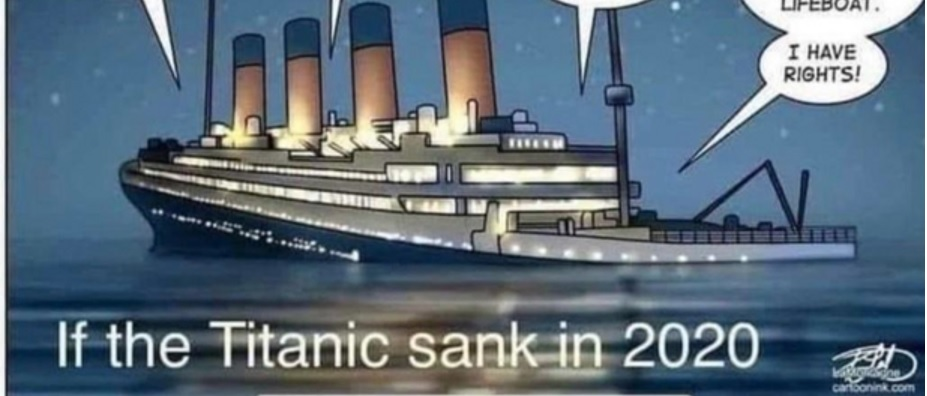

In [1]:
# Showing the poster of the movie from local folder;
from IPython.display import Image
Image(filename='Posters\Titanic.jpg') 

The image has been successfully shown from the local folder

''' Test the search_movie function by entering 'Random_error' (obviously, this will not be found, and you should be able to check whether your error catching code is working properly). '''

In [56]:
# search the movie named with Random_error

search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=5582d4a7
Error encountered:  Movie not found!


''' From the above result, we could see that it has returned the error message. So, there is no movie with a name Random_error. So, our code is working fine as expected. '''

In [57]:
# Connect to the Twitter API and do a simple data pull


# Instal the necessary  Twitter library available for python

!pip install python-twitter

'''
Assignment Steps: <br>

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment) <br>
b. Sign in to apps.twitter.com <br>
c. Click “Create New App” <br>
d. Give your app a name and description <br>
e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment <br>
f. Create an access token <br>
g. You should receive a consumer key and a token <br>
 '''

I have followed the above mentioned steps to create a APP called "KesavDSC540" and received consumer key and token to connect to twitter account

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

In [103]:
# Importing Twitter and setting up my user keys

import twitter

In [110]:
# Reading json file to get the access and secret keys for Twitter API

with open("twitter_api_key.json") as f:
    json_data = json.load(f)
    consumer_key  = json_data['consumer_key']
    consumer_secret = json_data['consumer_secret']
    access_token_key = json_data['access_token_key']
    access_token_secret = json_data['access_token_secret']
f.close()

In [111]:
# Creating API with user keys read in above step

api = twitter.Api(consumer_key=consumer_key,
  consumer_secret=consumer_secret,
    access_token_key=access_token_key,
    access_token_secret=access_token_secret)

In [112]:
# validating that the credentials are accurate

print(api.VerifyCredentials())

{"created_at": "Sun Jan 27 14:34:06 +0000 2013", "default_profile": true, "favourites_count": 82, "followers_count": 17, "friends_count": 303, "id": 1125230785, "id_str": "1125230785", "location": "Waukegan, IL", "name": "Kesav Adithya Venkidusamy", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://pbs.twimg.com/profile_images/748026853198274560/Wt1mImwT_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/748026853198274560/Wt1mImwT_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "KesavadithyaV", "status": {"created_at": "Tue Sep 29 05:49:37 +0000 2020", "favorite_count": 1, "favorited": true, "id": 13108189955

In [105]:
# searching for last 10 tweets with search term Bellevue University since 01/01/2022

api.GetSearch(term='Bellevue University', since=2022-1-1, count=10)

[Status(ID=1493735334542135298, ScreenName=RachaelLudwick, Created=Tue Feb 15 23:53:50 +0000 2022, Text='@AnnaZivarts There at least was one in university village mall which ... is a faux pedestrianized space that is inc… https://t.co/kH6gdE8VaY'),
 Status(ID=1493729903262711809, ScreenName=MutiaraTirtania, Created=Tue Feb 15 23:32:15 +0000 2022, Text='🏀HS Boys Basketball\nMayfield vs St. Mary\nRussell County vs Danville\nUniversity Heights vs Christian County\nWest Jes… https://t.co/nzU6l5nkne'),
 Status(ID=1493724074606006281, ScreenName=RandiElainePena, Created=Tue Feb 15 23:09:06 +0000 2022, Text='RT @DroverAthletics: #14 Science &amp; Arts⚾️ is off to a great start to the season and this weekend they host home-opening series against Frie…'),
 Status(ID=1493709939956752388, ScreenName=jacebrandy, Created=Tue Feb 15 22:12:56 +0000 2022, Text='RT @DroverAthletics: #14 Science &amp; Arts⚾️ is off to a great start to the season and this weekend they host home-opening series against Fri

In [106]:
# searching for last 10 tweets with data science

api.GetSearch(term='Data Science', count=10)

[Status(ID=1493352575105703939, ScreenName=NASA, Created=Mon Feb 14 22:32:53 +0000 2022, Text='Our #IXPE observatory sent back its first science image: Cassiopeia A—the remains of a star that exploded 11,000 li… https://t.co/tAb3OL5LSp'),
 Status(ID=1493331606446223361, ScreenName=cspan, Created=Mon Feb 14 21:09:34 +0000 2022, Text='.@LeaderMcConnell: "The only science that\'s changed in the last two weeks is the political science. The only data t… https://t.co/Twh8IZ4mPQ'),
 Status(ID=1493214838448922633, ScreenName=EssexPR, Created=Mon Feb 14 13:25:34 +0000 2022, Text='Time to be sensible, time to sit down and heal any arguments you’ve had with family or friends over Covid or vaccin… https://t.co/Lfe3UKRF5L'),
 Status(ID=1493746250965225472, ScreenName=milantactics, Created=Wed Feb 16 00:37:13 +0000 2022, Text='RT @keralista: Interesting Thread. A lot of the elements spoken here seem very similar. The Moneyball approach is what Milan are employing…'),
 Status(ID=1493746094005620738, 

a. Line <br>
b. Scatter <br>
c. Bar <br>
d. Histogram <br>
e. Density Plot <br>
f. Pie Chart <br>

In [63]:
# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

# Import the necessary libraries required for this exercises.

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [64]:
# I have considered Boston Housing dataset for this assignment. Hence creating pandas dataframe for the same

house_df = pd.read_csv("Boston_housing.csv",error_bad_lines=False, index_col=False, dtype='unicode')

In [67]:
# printing the shape of the dataframe and count

print("The number of rows and columns present in the dataframe: {}".format(house_df.shape))
print("\nSample records")
house_df.head()

The number of rows and columns present in the dataframe: (506, 14)

Sample records


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [71]:
# printing the datatypes for each of the field present in the dataframe

house_df.dtypes

CRIM       object
ZN         object
INDUS      object
CHAS       object
NOX        object
RM         object
AGE        object
DIS        object
RAD        object
TAX        object
PTRATIO    object
B          object
LSTAT      object
PRICE      object
dtype: object

In [74]:
# Converting the metadata to float based on the data present in each of the column

house_df['CRIM']=house_df['CRIM'].astype(float,errors='raise')
house_df['INDUS']=house_df['INDUS'].astype(float,errors='raise')
house_df['NOX']=house_df['NOX'].astype(float,errors='raise')
house_df['RM']=house_df['RM'].astype(float,errors='raise')
house_df['AGE']=house_df['AGE'].astype(float,errors='raise')
house_df['DIS']=house_df['DIS'].astype(float,errors='raise')
house_df['PTRATIO']=house_df['PTRATIO'].astype(float,errors='raise')
house_df['B']=house_df['B'].astype(float,errors='raise')
house_df['LSTAT']=house_df['LSTAT'].astype(float,errors='raise')
house_df['PRICE']=house_df['PRICE'].astype(float,errors='raise')
house_df['ZN']=house_df['ZN'].astype(float,errors='raise')
house_df['CHAS']=house_df['CHAS'].astype(int,errors='raise')
house_df['RAD']=house_df['RAD'].astype(int,errors='raise')
house_df['TAX']=house_df['TAX'].astype(int,errors='raise')

In [75]:
# Print the metadata after conversion

house_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int32
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int32
TAX          int32
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

<AxesSubplot:title={'center':'Housing Dataset Line Chart'}>

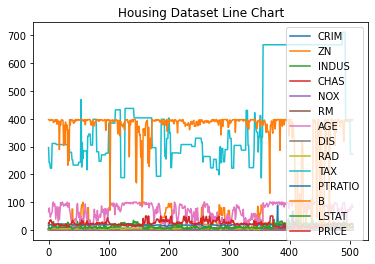

In [81]:
# Plotting the necessary line chart for the house dataframe

house_df.plot.line(title="Housing Dataset Line Chart")

<AxesSubplot:title={'center':'Housing Dataset Scatter Plot'}, xlabel='CRIM', ylabel='PRICE'>

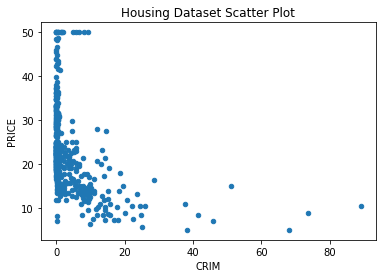

In [86]:
# Plotting the scatter plot for housing dataframe

house_df.plot.scatter(x='CRIM',y='PRICE', title="Housing Dataset Scatter Plot")

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

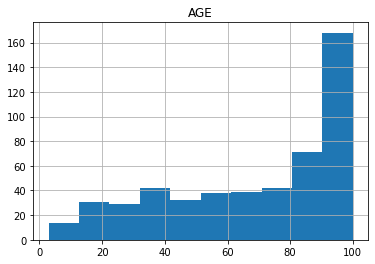

In [88]:
# plotting histogram for the housing dataset

house_df.hist(column='AGE',bins=10)

In [97]:
# Plotting Pie chart for the house dataframe

house_pie_df = house_df[['RAD','CRIM']].groupby('RAD').count()
house_pie_df

,CRIM
RAD,
1,20
2,24
3,38
4,110
5,115
6,26
7,17
8,24
24,132


<AxesSubplot:ylabel='CRIM'>

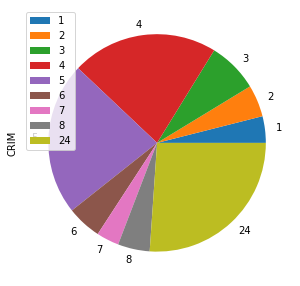

In [102]:
# Plot pie chart for the dataframe created

house_pie_df.plot.pie(y="CRIM",figsize=(5,5))